In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, dct, idct

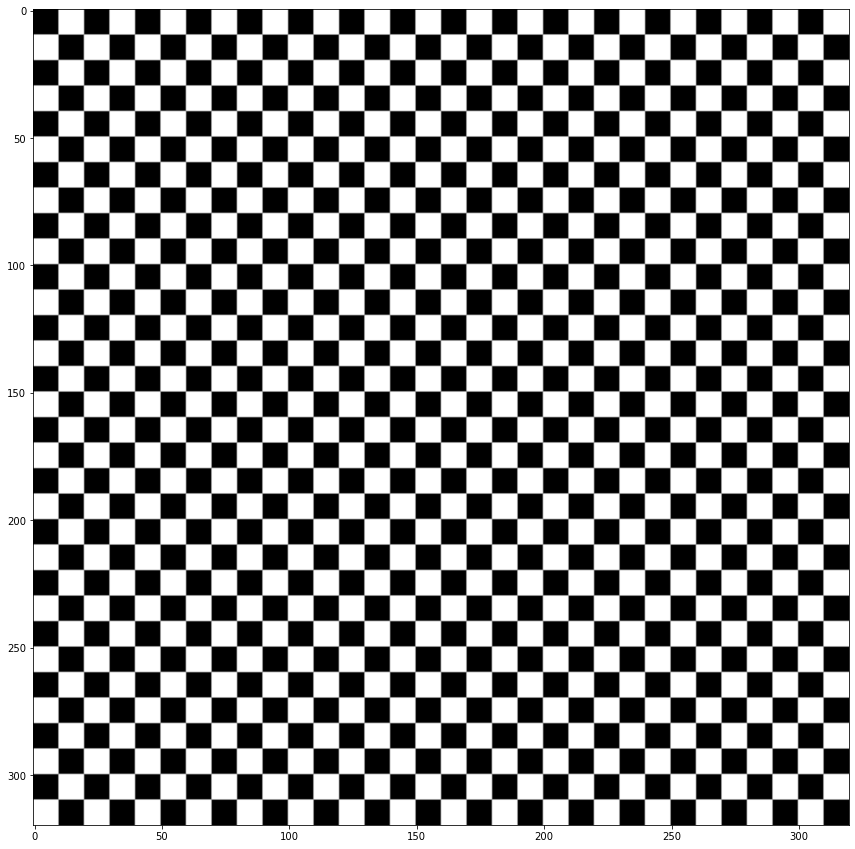

In [77]:
img = Image.open('./Immagini/320x320.bmp').convert('L')
plt.figure(figsize = (18, 15))
plt.imshow(img, cmap = 'Greys_r')
plt.show()

In [68]:
def plot_images_compare(img1, img2):
    fig = plt.figure(figsize=(30, 30))
    ax = fig.add_subplot(1, 2, 1)
    imgplot = plt.imshow(img1, cmap = 'Greys_r')
    ax.set_title('Before')

    ax = fig.add_subplot(1, 2, 2)
    imgplot = plt.imshow(img2, cmap = 'Greys_r')
    ax.set_title('After')

    plt.show()

In [34]:
width = img.width
height = img.height
pixel_matrix = np.zeros((height, width), dtype = np.uint8)
for y in range(height):
    for x in range(width):
        pixel_matrix[y, x] = img.getpixel((x, y)) % 256

# equivalent to np.array(img)

In [84]:
matrix = np.array(img)
matrix.shape

(320, 320)

In [91]:
def round_values(x): 
    if x < 0:
        return 0 
    elif x > 255:
        return 255 
    else:
        return x

def compress_image(image, F, d):
    # ottenimento dimensioni immagine 
    height = image.shape[0]
    width = image.shape[1]
    # ottenimento dimensioni sulla base della dimensione scelta per i blocchi
    cut_height = F * (height // F)
    cut_width = F * (width // F)
    # allocazione matrici per dct e idct
    dct2_matrix = np.zeros((cut_height, cut_width))
    idct2_matrix = np.zeros((cut_height, cut_width))
    # ridimensionamento matrice
    image = image[:cut_height, :cut_width]
    for r in range(0, cut_height, F): 
        for c in range(0, cut_width, F):
            # calcolo dct sul blocco
            dct2_matrix[r:r+F, c:c+F] = dct(dct(image[r:r+F,c:c+F].transpose(), norm="ortho").transpose(), norm="ortho")
            # taglio delle frequenze
            for x in range(F): 
                lb = d - x
                if x > d: 
                    lb = 0
                for y in range(lb, F): 
                    dct2_matrix[x + r, y + c] = 0
    
    for r in range(0, cut_height, F): 
        for c in range(0, cut_width, F):
            # calcolo idct sul blocco
            idct2_matrix[r:r+F, c:c+F] = idct(idct(dct2_matrix[r:r+F, c:c+F].transpose(), norm="ortho").transpose(), norm="ortho")


    for r in range(cut_height):
        for c in range(cut_width):
            # arrotondamento valori
            idct2_matrix[r, c] = round_values(idct2_matrix[r, c])
    
    return np.array(idct2_matrix, dtype = np.uint8)


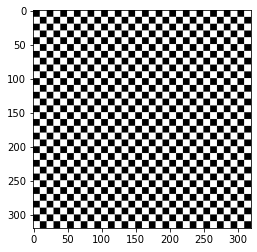

In [92]:
c_img = compress_image(np.array(img), F = 2, d = 1)
plt.imshow(c_img, cmap='Greys_r')

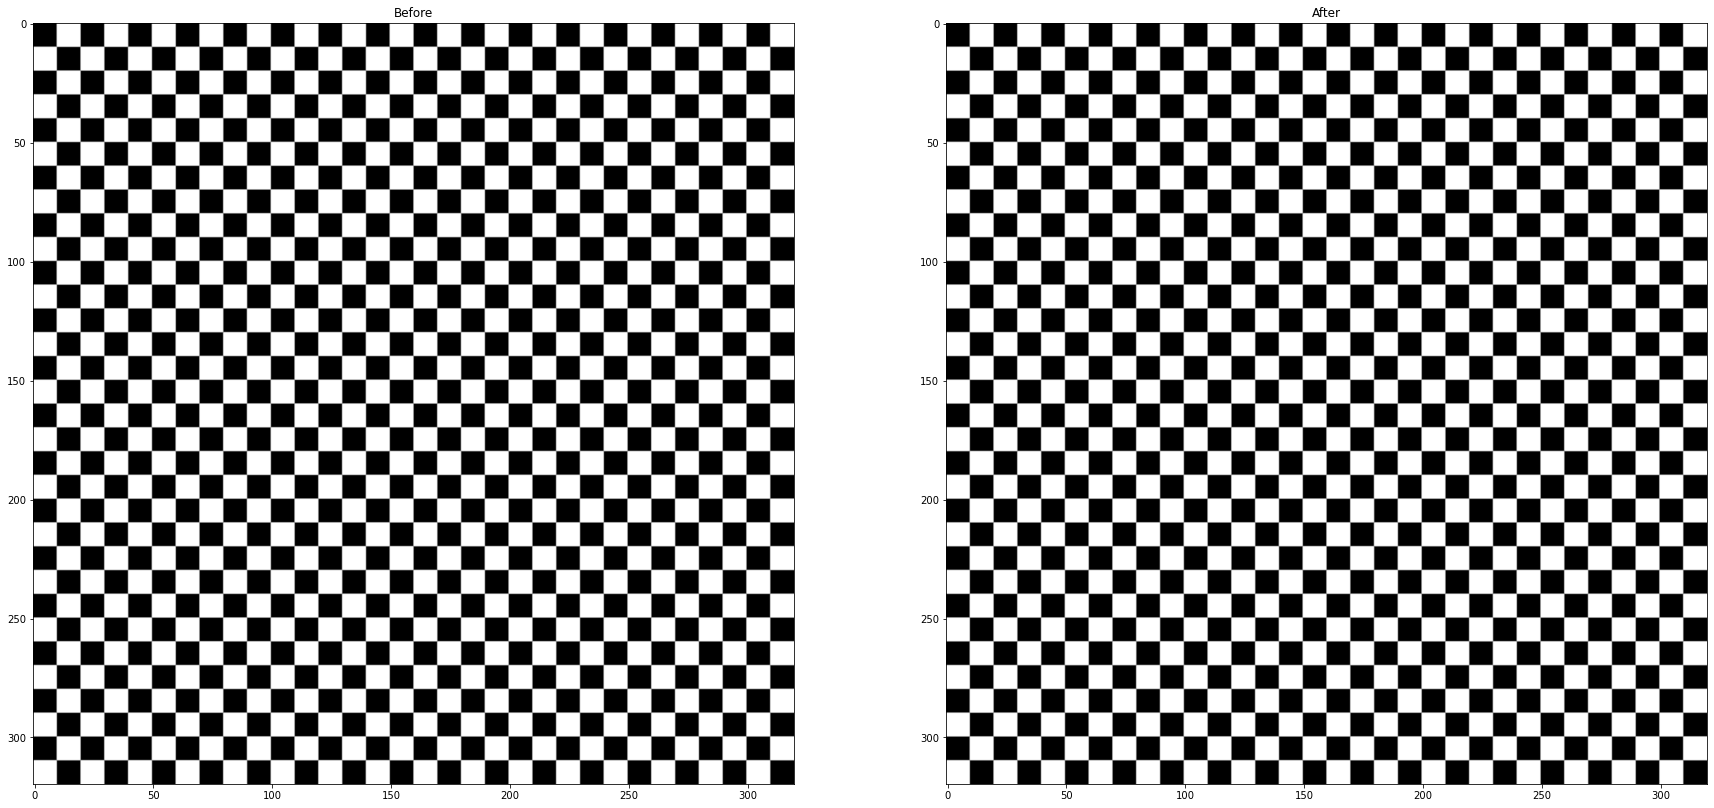

In [90]:
plot_images_compare(img, c_img)